# **Import Necessary Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns

## **Read Dataset**

In [38]:
ds = pd.read_csv('/content/diabetes_prediction__dataset.csv', on_bad_lines='skip')

In [4]:
ds

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,46.0,0.0,0.0,never,32.37,4.8,140,0
1,Female,58.0,0.0,0.0,not current,27.32,6.8,280,1
2,Male,44.0,0.0,0.0,never,30.13,4.0,145,0
3,Female,80.0,0.0,0.0,not current,21.78,5.8,90,0
4,Female,52.0,0.0,0.0,current,28.09,4.8,90,0
...,...,...,...,...,...,...,...,...,...
99995,Female,51.0,0.0,0.0,former,23.16,6.2,145,0
99996,Male,73.0,0.0,0.0,No Info,27.54,5.7,130,0
99997,Male,13.0,0.0,0.0,never,24.90,6.2,90,0
99998,Female,44.0,0.0,0.0,No Info,27.32,4.0,130,0


# **Data Preprocessing**

### **Checking for null values**

In [39]:
ds.isnull().any() #checking for null values in each column

gender                 False
age                    False
hypertension            True
heart_disease           True
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [40]:
ds.info() #checking no-null values count status to make sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         99493 non-null   float64
 3   heart_disease        99570 non-null   float64
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [41]:
ds.isnull().sum()

gender                   0
age                      0
hypertension           507
heart_disease          430
smoking_history          0
bmi                      0
HbA1c_level              0
blood_glucose_level      0
diabetes                 0
dtype: int64

### **Removing Null Values**

In [42]:
ds = ds.dropna()

In [43]:
ds.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [44]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### **checking for unique values in columns**

In [45]:
unique_values = ds['gender'].unique()
print(unique_values)

['Male' 'Female' 'Other']


In [46]:
unique_values = ds['smoking_history'].unique()
print(unique_values)

['never' 'not current' 'current' 'No Info' 'former' 'ever']


In [47]:
value_counts = ds['gender'].value_counts()

print(value_counts)

Female    58010
Male      41035
Other        18
Name: gender, dtype: int64


In [48]:
value_counts = ds['smoking_history'].value_counts()
print(value_counts)

No Info        35477
never          34775
former          9268
current         9200
not current     6387
ever            3956
Name: smoking_history, dtype: int64


### **One-hot encoding and adding new features**

In [49]:
import pandas as pd
ds = pd.get_dummies(ds, columns=['gender'])
print(ds)

        age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0      46.0           0.0            0.0           never  32.37          4.8   
1      58.0           0.0            0.0     not current  27.32          6.8   
2      44.0           0.0            0.0           never  30.13          4.0   
3      80.0           0.0            0.0     not current  21.78          5.8   
4      52.0           0.0            0.0         current  28.09          4.8   
...     ...           ...            ...             ...    ...          ...   
99995  51.0           0.0            0.0          former  23.16          6.2   
99996  73.0           0.0            0.0         No Info  27.54          5.7   
99997  13.0           0.0            0.0           never  24.90          6.2   
99998  44.0           0.0            0.0         No Info  27.32          4.0   
99999  52.0           0.0            0.0           never  27.55          4.5   

       blood_glucose_level  diabetes  g

### **Label Encoding for column "smoking history"**

In [50]:
from sklearn.preprocessing import LabelEncoder

df = ds.copy()

label_encoder = LabelEncoder()

print(df)

        age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0      46.0           0.0            0.0           never  32.37          4.8   
1      58.0           0.0            0.0     not current  27.32          6.8   
2      44.0           0.0            0.0           never  30.13          4.0   
3      80.0           0.0            0.0     not current  21.78          5.8   
4      52.0           0.0            0.0         current  28.09          4.8   
...     ...           ...            ...             ...    ...          ...   
99995  51.0           0.0            0.0          former  23.16          6.2   
99996  73.0           0.0            0.0         No Info  27.54          5.7   
99997  13.0           0.0            0.0           never  24.90          6.2   
99998  44.0           0.0            0.0         No Info  27.32          4.0   
99999  52.0           0.0            0.0           never  27.55          4.5   

       blood_glucose_level  diabetes  g

In [52]:
unique_values = ds['smoking_history'].unique()
print(unique_values)

['never' 'not current' 'current' 'No Info' 'former' 'ever']


In [53]:
df['smoking_history'] = label_encoder.fit_transform(ds['smoking_history'])
df['smoking_history'].unique()

array([4, 5, 1, 0, 3, 2])

In [19]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,46.0,0.0,0.0,4,32.37,4.8,140,0,0,1,0
1,58.0,0.0,0.0,5,27.32,6.8,280,1,1,0,0
2,44.0,0.0,0.0,4,30.13,4.0,145,0,0,1,0
3,80.0,0.0,0.0,5,21.78,5.8,90,0,1,0,0
4,52.0,0.0,0.0,1,28.09,4.8,90,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,51.0,0.0,0.0,3,23.16,6.2,145,0,1,0,0
99996,73.0,0.0,0.0,0,27.54,5.7,130,0,0,1,0
99997,13.0,0.0,0.0,4,24.90,6.2,90,0,0,1,0
99998,44.0,0.0,0.0,0,27.32,4.0,130,0,1,0,0


# **Resampling Imbalanced Data**

In [56]:
print(ds['diabetes'].value_counts())

0    90640
1     8423
Name: diabetes, dtype: int64


In [20]:
from imblearn.over_sampling import SMOTE

### **Separate features**

In [21]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### **Initialize the SMOTE algorithm and perform oversampling**

In [22]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

### **create a new dataframe for the combined data**

In [23]:
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

### **Print the new balanced DataFrame and the count of unique values in the 'diabetes' column**

In [24]:
print("Balanced DataFrame using SMOTE:")
print(df_balanced)

print("Count of unique values in 'diabetes' column after balancing:")
print(df_balanced['diabetes'].value_counts())

Balanced DataFrame using SMOTE:
              age  hypertension  heart_disease  smoking_history        bmi  \
0       46.000000      0.000000            0.0                4  32.370000   
1       58.000000      0.000000            0.0                5  27.320000   
2       44.000000      0.000000            0.0                4  30.130000   
3       80.000000      0.000000            0.0                5  21.780000   
4       52.000000      0.000000            0.0                1  28.090000   
...           ...           ...            ...              ...        ...   
181275  50.677724      0.000000            0.0                2  40.599908   
181276   4.419349      0.000000            0.0                4  18.642130   
181277  69.880831      0.000000            0.0                3  44.214873   
181278  70.000000      0.131240            0.0                3  45.754210   
181279  69.000000      0.998724            0.0                3  26.308813   

        HbA1c_level  blood_gluc

## **Identifying Outliers**

In [54]:
df_balanced.shape

(181280, 11)

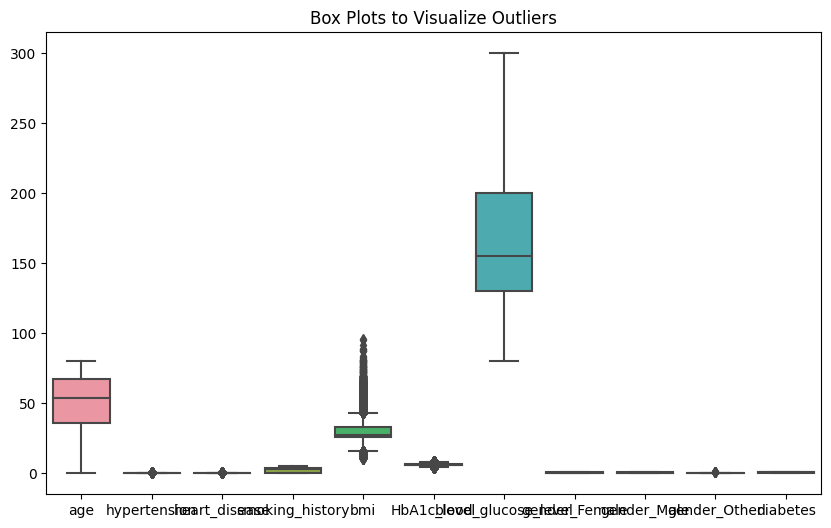

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_balanced)
plt.title('Box Plots to Visualize Outliers')
plt.show()

## **Feature Importance**

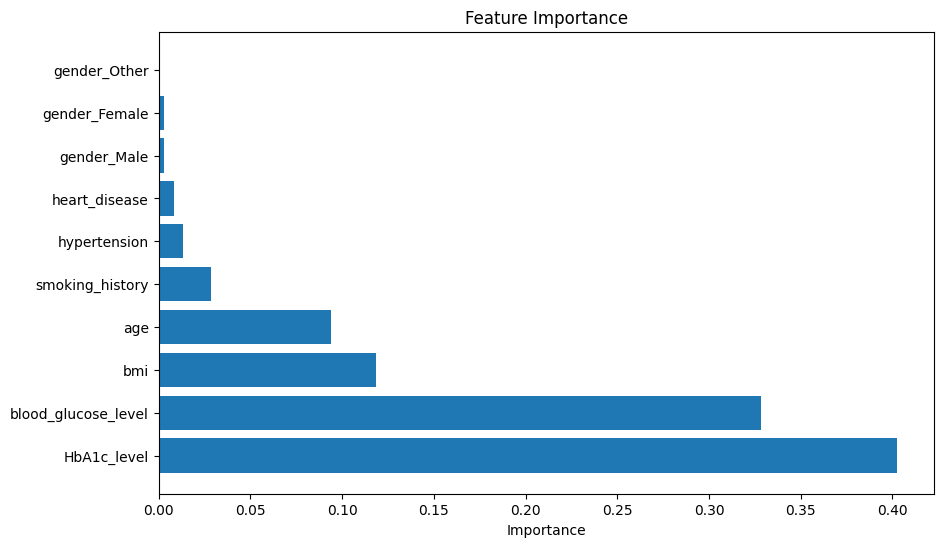

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

will not remove outliers in bmi column due to feature importance

## **Removing Duplicates**

In [28]:
df_balanced.shape

(181280, 11)

In [29]:
df = df_balanced.drop_duplicates()
print("DataFrame without duplicates:")
print(df)

DataFrame without duplicates:
              age  hypertension  heart_disease  smoking_history        bmi  \
0       46.000000      0.000000            0.0                4  32.370000   
1       58.000000      0.000000            0.0                5  27.320000   
2       44.000000      0.000000            0.0                4  30.130000   
3       80.000000      0.000000            0.0                5  21.780000   
4       52.000000      0.000000            0.0                1  28.090000   
...           ...           ...            ...              ...        ...   
181275  50.677724      0.000000            0.0                2  40.599908   
181276   4.419349      0.000000            0.0                4  18.642130   
181277  69.880831      0.000000            0.0                3  44.214873   
181278  70.000000      0.131240            0.0                3  45.754210   
181279  69.000000      0.998724            0.0                3  26.308813   

        HbA1c_level  blood_glucos

In [30]:
df.shape

(177257, 11)

In [31]:
print(df['diabetes'].value_counts())

1    90392
0    86865
Name: diabetes, dtype: int64


###**Plotting the Data Before Balancing**

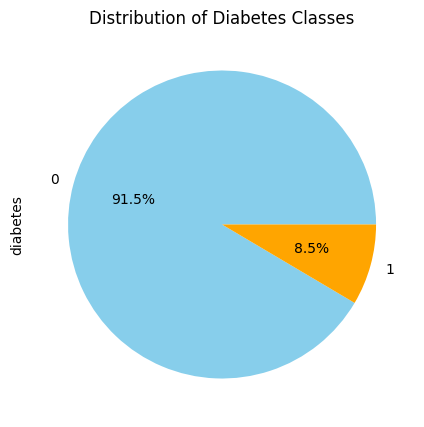

In [32]:
plt.figure(figsize=(5, 5))
ds['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Diabetes Classes')
plt.show()

### **Plotting the Data After Balancing**



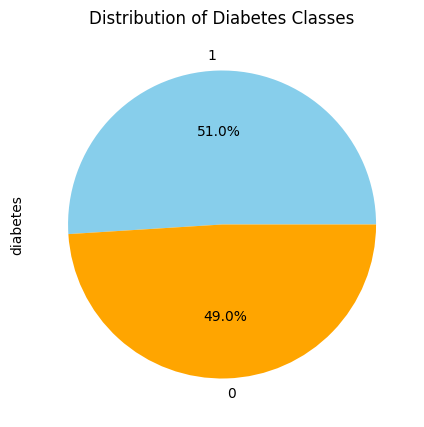

In [33]:
plt.figure(figsize=(5, 5))
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Diabetes Classes')
plt.show()

### **Rounding floats in Column**

In [34]:
df['age'] = df['age'].round()
df['HbA1c_level'] = df['HbA1c_level'].round(2)
df['bmi'] = df['bmi'].round(2)
df['heart_disease'] = df['heart_disease'].round()
df['hypertension'] = df['hypertension'].round()


<ipython-input-34-6b30aaf8627e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].round()
<ipython-input-34-6b30aaf8627e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HbA1c_level'] = df['HbA1c_level'].round(2)
<ipython-input-34-6b30aaf8627e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,diabetes
0,46.0,0.0,0.0,4,32.37,4.80,140,0,1,0,0
1,58.0,0.0,0.0,5,27.32,6.80,280,1,0,0,1
2,44.0,0.0,0.0,4,30.13,4.00,145,0,1,0,0
3,80.0,0.0,0.0,5,21.78,5.80,90,1,0,0,0
4,52.0,0.0,0.0,1,28.09,4.80,90,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
181275,51.0,0.0,0.0,2,40.60,5.90,240,0,0,0,1
181276,4.0,0.0,0.0,4,18.64,6.23,280,0,0,0,1
181277,70.0,0.0,0.0,3,44.21,6.27,159,1,0,0,1
181278,70.0,0.0,0.0,3,45.75,5.97,130,1,0,0,1


### **Removing Unnecessary Columns after Preprocessing**

In [ ]:
print(df['heart_disease'].value_counts())

0.0    162109
1.0     15148
Name: heart_disease, dtype: int64


In [ ]:
print(df['hypertension'].value_counts())

0.0    150671
1.0     26586
Name: hypertension, dtype: int64


In [ ]:
print(df['gender_Other'].value_counts())

0    177239
1        18
Name: gender_Other, dtype: int64


In [35]:
df = df.drop(columns=['gender_Other'])

In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,diabetes
0,46.0,0.0,0.0,4,32.37,4.80,140,0,1,0
1,58.0,0.0,0.0,5,27.32,6.80,280,1,0,1
2,44.0,0.0,0.0,4,30.13,4.00,145,0,1,0
3,80.0,0.0,0.0,5,21.78,5.80,90,1,0,0
4,52.0,0.0,0.0,1,28.09,4.80,90,1,0,0
...,...,...,...,...,...,...,...,...,...,...
181275,51.0,0.0,0.0,2,40.60,5.90,240,0,0,1
181276,4.0,0.0,0.0,4,18.64,6.23,280,0,0,1
181277,70.0,0.0,0.0,3,44.21,6.27,159,1,0,1
181278,70.0,0.0,0.0,3,45.75,5.97,130,1,0,1


In [36]:
df.rename(columns={'gender_Male': 'Male', 'gender_Female': 'Female',}, inplace=True)

In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,diabetes
0,46.0,0.0,0.0,4,32.37,4.80,140,0,1,0
1,58.0,0.0,0.0,5,27.32,6.80,280,1,0,1
2,44.0,0.0,0.0,4,30.13,4.00,145,0,1,0
3,80.0,0.0,0.0,5,21.78,5.80,90,1,0,0
4,52.0,0.0,0.0,1,28.09,4.80,90,1,0,0
...,...,...,...,...,...,...,...,...,...,...
181275,51.0,0.0,0.0,2,40.60,5.90,240,0,0,1
181276,4.0,0.0,0.0,4,18.64,6.23,280,0,0,1
181277,70.0,0.0,0.0,3,44.21,6.27,159,1,0,1
181278,70.0,0.0,0.0,3,45.75,5.97,130,1,0,1


In [ ]:
df.to_csv('new_diabetes_data.csv', index= False)

In [ ]:
df = pd.read_csv('/content/new_diabetes_data (4).csv', on_bad_lines='skip')

In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,diabetes
0,46.0,0.0,0.0,4,32.37,4.80,140,0,1,0
1,58.0,0.0,0.0,5,27.32,6.80,280,1,0,1
2,44.0,0.0,0.0,4,30.13,4.00,145,0,1,0
3,80.0,0.0,0.0,5,21.78,5.80,90,1,0,0
4,52.0,0.0,0.0,1,28.09,4.80,90,1,0,0
...,...,...,...,...,...,...,...,...,...,...
177252,51.0,0.0,0.0,2,40.60,5.90,240,0,0,1
177253,4.0,0.0,0.0,4,18.64,6.23,280,0,0,1
177254,70.0,0.0,0.0,3,44.21,6.27,159,1,0,1
177255,70.0,0.0,0.0,3,45.75,5.97,130,1,0,1


# **Data Visualization**

### **Plotting Diabetes Status for each Gender**

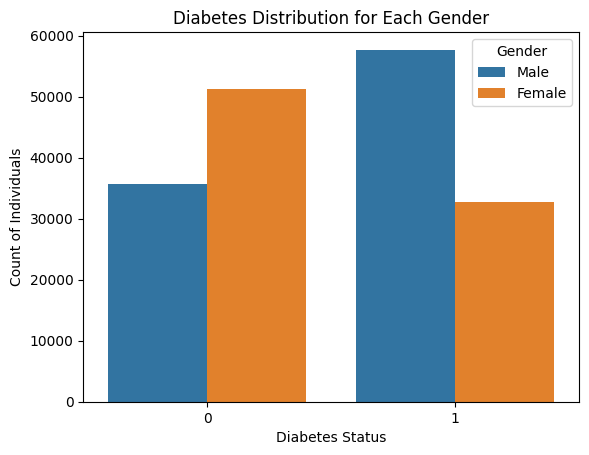

In [ ]:
df['gender'] = df[['Male', 'Female']].idxmax(axis=1)
sns.countplot(x='diabetes', hue='gender', data=df)
plt.title('Diabetes Distribution for Each Gender')
plt.xlabel('Diabetes Status')
plt.ylabel('Count of Individuals')
plt.legend(title='Gender')
plt.show()

Diabetes is higher and more common in Males than Females.

### **Plotting Distribution by Age**

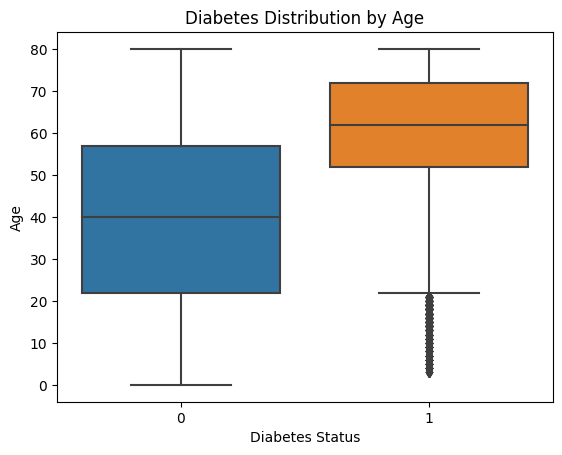

In [ ]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Diabetes Distribution by Age')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()

Most people diagnosed with diabetes are 50 year old or higher.

### **Plotting Blood Glucose Level By Diabetes Status**

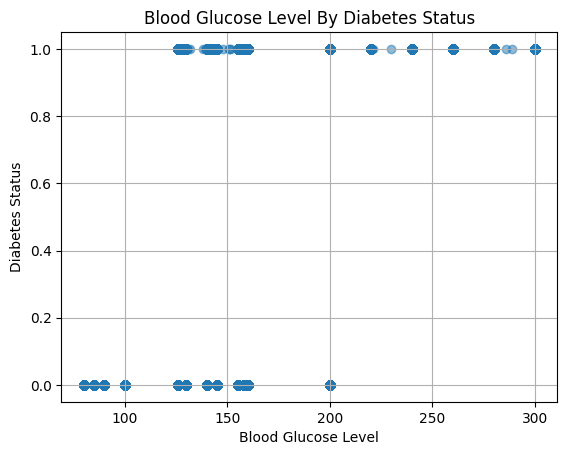

In [ ]:
plt.scatter(df['blood_glucose_level'], df['diabetes'], alpha=0.5)
plt.title('Blood Glucose Level By Diabetes Status')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes Status')
plt.grid(True)
plt.show()

Non-diabetic people do not exceed the blood glucose level of 200, while diabetic people are more likely to exceed 200 blood glucose level.

## **HbA1C level by Diabetic People**

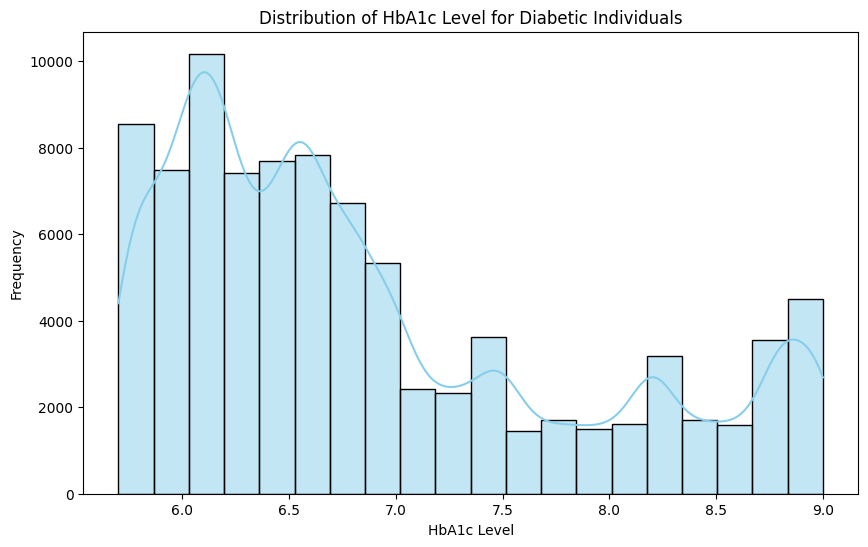

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select data for individuals with diabetes
diabetes_data = df[df['diabetes'] == 1]

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['HbA1c_level'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of HbA1c Level for Diabetic Individuals')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.show()

The plot shows that the majority of diabetic individuals (60%) have HbA1c levels between 6.5 and 7.5.

In [ ]:
df = df.drop(columns=['gender'])

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (141805, 9)
X_test shape: (35452, 9)
y_train shape: (141805,)
y_test shape: (35452,)


# **Data Modeling**

## **Logistic Regression Classification Before Balancing**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with the best hyperparameters
logistic_model = LogisticRegression(penalty='l2', C=0.01)
logistic_model.fit(X_train_scaled, y_train)

# Predictions on test
y_pred = logistic_model.predict(X_test_scaled)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9593701105334881
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18121
           1       0.87      0.61      0.72      1692

    accuracy                           0.96     19813
   macro avg       0.92      0.80      0.85     19813
weighted avg       0.96      0.96      0.96     19813



Very High Accuracy of 96, low recall and f1 score on diabetic section(minority class)

## **Logistic Regression Classifier Using Grid Search**

### **import necessary librarires**



In [34]:
# import necessary librarires
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Create a logistic regression model
logreg_model = LogisticRegression(solver='lbfgs')

### **Apply grid search using 5-fold cross-validation**

In [35]:
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

### **print the cross validation (std deviation and mean results)**

In [36]:
lr_mean_scores = grid_search.cv_results_['mean_test_score']
lr_std_scores = grid_search.cv_results_['std_test_score']


cv_results = pd.DataFrame({'Mean': lr_mean_scores, 'Std': lr_std_scores})
print("Cross-Validation Results:\n", cv_results)


Cross-Validation Results:
        Mean       Std
0  0.908064  0.000749
1  0.908459  0.000674
2  0.908339  0.000791
3  0.908339  0.000826
4  0.908339  0.000816


### **Print the best hyperparameters and make predictions**

In [37]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


y_pred = grid_search.predict(X_test_scaled)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


### **Print the accuracy and the classification report**

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9081857158975516
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     17242
           1       0.92      0.90      0.91     18210

    accuracy                           0.91     35452
   macro avg       0.91      0.91      0.91     35452
weighted avg       0.91      0.91      0.91     35452



## **Logistic Regression Classifier with Best Hyperparameters**

### **Train the model with best hyperparameters and print the accuracy with confusion matrix**

Test Accuracy: 0.9081857158975516
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     17242
           1       0.92      0.90      0.91     18210

    accuracy                           0.91     35452
   macro avg       0.91      0.91      0.91     35452
weighted avg       0.91      0.91      0.91     35452



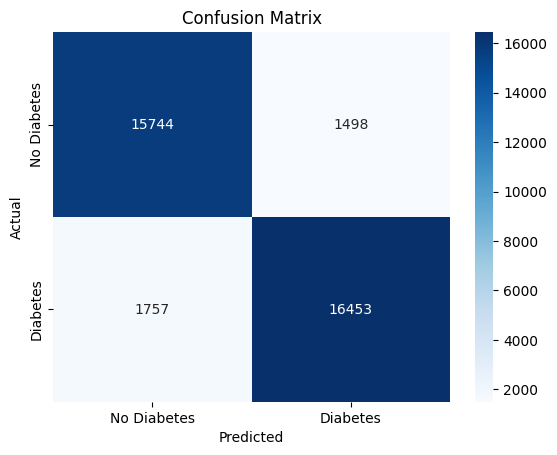

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into train and test sets
X_train, X_test, y_train, LR_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with the best hyperparameters
logistic_model = LogisticRegression(penalty='l2', C=0.01)
logistic_model.fit(X_train_scaled, y_train)

# Predictions on test
LR_y_pred = logistic_model.predict(X_test_scaled)

# Print the accuracy
accuracy = accuracy_score(LR_y_test, LR_y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print("Classification Report:\n", classification_report(LR_y_test, LR_y_pred))

# Plot confusion matrix
lr_cm = confusion_matrix(LR_y_test, LR_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Random Forrest Classification Before Balancing**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [5],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Test Accuracy: 0.9712814818553475
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18121
           1       0.98      0.67      0.80      1692

    accuracy                           0.97     19813
   macro avg       0.98      0.84      0.89     19813
weighted avg       0.97      0.97      0.97     19813



Very High Accuracy of 97, low recall and f1 score on diabetic section(minority class)

## **Random Forrest Classification Using Grid Search**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [1,5,10],
    'max_depth': [10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [2,4]
}

### **Perform grid search using 5-fold cross-validation**

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [1, 5, 10]},
             scoring='accuracy')

### **Print the Mean and STD Dev**




In [ ]:
rf_mean_scores = grid_search.cv_results_['mean_test_score']
rf_std_scores = grid_search.cv_results_['std_test_score']


cv_results = pd.DataFrame({'Mean': rf_mean_scores, 'Std': rf_std_scores})
print("Cross-Validation Results:\n", cv_results)

Cross-Validation Results:
         Mean       Std
0   0.913395  0.002861
1   0.934050  0.002515
2   0.934438  0.002061
3   0.916505  0.005940
4   0.931180  0.003780
5   0.933402  0.002638
6   0.913261  0.008437
7   0.930426  0.001760
8   0.932668  0.002252
9   0.914918  0.008091
10  0.931159  0.003141
11  0.933105  0.001555


### **Print the best hyperparameters and make predictions**

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


### **Print the accuracy and the classification report**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9345876114182556
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     17242
           1       0.93      0.94      0.94     18210

    accuracy                           0.93     35452
   macro avg       0.93      0.93      0.93     35452
weighted avg       0.93      0.93      0.93     35452



## **Random Forrest Classification with Best Hyperparameters**

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Test Accuracy: 0.9282410019180865
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     17242
           1       0.92      0.94      0.93     18210

    accuracy                           0.93     35452
   macro avg       0.93      0.93      0.93     35452
weighted avg       0.93      0.93      0.93     35452



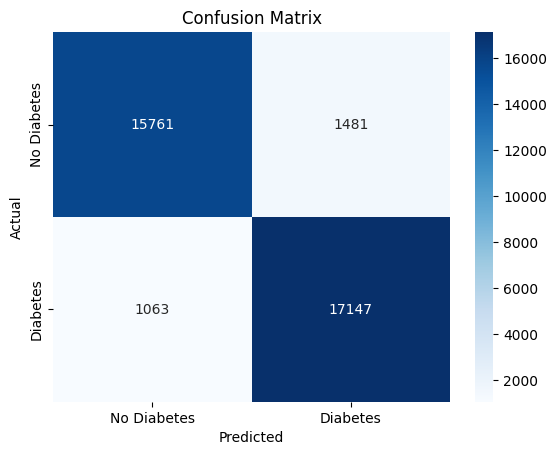

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, RF_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [5],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
RF_y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(RF_y_test, RF_y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(RF_y_test, RF_y_pred))

# Plot confusion matrix
RF_cm = confusion_matrix(RF_y_test, RF_y_pred)
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Decision Tree Classification Before Balancing**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters for grid search
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a decision tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Fit the model on the training set
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.971180538030586
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18121
           1       0.98      0.68      0.80      1692

    accuracy                           0.97     19813
   macro avg       0.97      0.84      0.89     19813
weighted avg       0.97      0.97      0.97     19813



Very High Accuracy of 97, low recall and f1 score on diabetic section(minority class)

## **Decision Tree Classification Using Grid Search**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create a grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

### **Print the Mean and STD Dev**

In [ ]:
dt_mean_scores = grid_search.cv_results_['mean_test_score']
dt_std_scores = grid_search.cv_results_['std_test_score']


cv_results = pd.DataFrame({'Mean': dt_mean_scores, 'Std': dt_std_scores})
print("Cross-Validation Results:\n", cv_results)

Cross-Validation Results:
        Mean       Std
0  0.923028  0.001502
1  0.923028  0.001502
2  0.923028  0.001502
3  0.923028  0.001502
4  0.929452  0.002325
5  0.929410  0.002307
6  0.929445  0.002315
7  0.929445  0.002315


### **Print the best hyperparameters and make predictions**

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


### **Print the accuracy and the classification report**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9303283312648087
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17242
           1       0.92      0.94      0.93     18210

    accuracy                           0.93     35452
   macro avg       0.93      0.93      0.93     35452
weighted avg       0.93      0.93      0.93     35452



## **Decision Tree Classification with best hyperparameters**

Test Accuracy: 0.9303283312648087
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17242
           1       0.92      0.94      0.93     18210

    accuracy                           0.93     35452
   macro avg       0.93      0.93      0.93     35452
weighted avg       0.93      0.93      0.93     35452



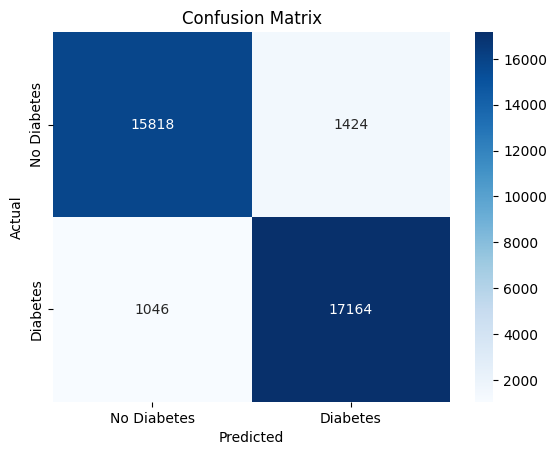

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, DT_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters for grid search
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a decision tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Fit the model on the training set
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
DT_y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(DT_y_test, DT_y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(DT_y_test, DT_y_pred))

# Plot confusion matrix
DT_cm = confusion_matrix(DT_y_test, DT_y_pred)
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **SVM Before Balancing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')  # Adjust parameters as needed

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9469540200878211
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18121
           1       1.00      0.38      0.55      1692

    accuracy                           0.95     19813
   macro avg       0.97      0.69      0.76     19813
weighted avg       0.95      0.95      0.94     19813



Very High Accuracy of 95, very low recall and f1 score on diabetic section(minority class)

# **SVM Using grid search**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Create an SVM Classifier
svm_classifier = SVC()

# Create a grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Code Execution took too long due to complexity.

## **SVM With Best Hyperparameters**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Drop the x feature and target the y feature
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, SVM_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Standardization
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Best hyperparameters from your grid search
best_params = {'C': 0.1, 'kernel': 'rbf', 'gamma': 'scale'}

# Create an SVM Classifier with the best hyperparameters
svm_classifier = SVC(**best_params)

# Fit the model to the training data
svm_classifier.fit(scaled_X_train, y_train)

# Make predictions on the test set
SVM_y_pred = svm_classifier.predict(scaled_X_test)

# Evaluate the model
accuracy = accuracy_score(SVM_y_test, SVM_y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(SVM_y_test, SVM_y_pred))

Test Accuracy: 0.9170991763511226
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     17242
           1       0.92      0.92      0.92     18210

    accuracy                           0.92     35452
   macro avg       0.92      0.92      0.92     35452
weighted avg       0.92      0.92      0.92     35452



### **Plot the Confusion Matrix**

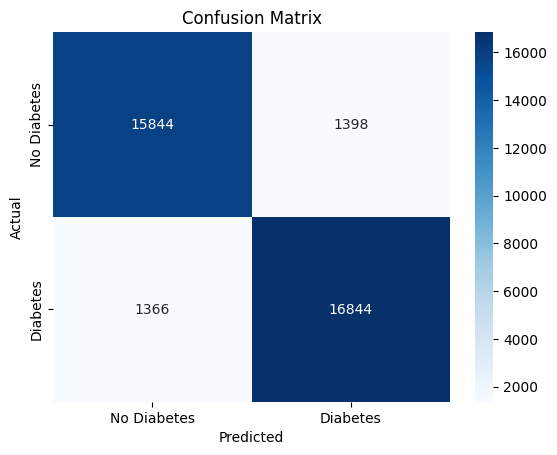

In [44]:
SVM_cm = confusion_matrix(SVM_y_test, SVM_y_pred)
sns.heatmap(SVM_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **ANN Classification Before Balancing**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a more complex ANN model
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=64, activation="relu"))
ann_model.add(tf.keras.layers.Dropout(0.5))
ann_model.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and a validation set
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann_model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/100
2229/2229 [==============================] - 8s 3ms/step - loss: 0.1522 - accuracy: 0.9453 - val_loss: 0.1162 - val_accuracy: 0.9567
Epoch 2/100
2229/2229 [==============================] - 5s 2ms/step - loss: 0.1165 - accuracy: 0.9602 - val_loss: 0.1089 - val_accuracy: 0.9594
Epoch 3/100
2229/2229 [==============================] - 6s 3ms/step - loss: 0.1068 - accuracy: 0.9640 - val_loss: 0.1007 - val_accuracy: 0.9637
Epoch 4/100
2229/2229 [==============================] - 6s 3ms/step - loss: 0.0989 - accuracy: 0.9669 - val_loss: 0.0986 - val_accuracy: 0.9634
Epoch 5/100
2229/2229 [==============================] - 5s 2ms/step - loss: 0.0936 - accuracy: 0.9684 - val_loss: 0.0926 - val_accuracy: 0.9663
Epoch 6/100
2229/2229 [==============================] - 7s 3ms/step - loss: 0.0913 - accuracy: 0.9697 - val_loss: 0.0918 - val_accuracy: 0.9671
Epoch 7/100
2229/2229 [==============================] - 5s 2ms/step - loss: 0.0902 - accuracy: 0.9703 - val_loss: 0.0913 - val_ac

## **ANN Classification After Balancing**

Epoch 1/100
3989/3989 [==============================] - 11s 3ms/step - loss: 0.2110 - accuracy: 0.9040 - val_loss: 0.1714 - val_accuracy: 0.9178
Epoch 2/100
3989/3989 [==============================] - 10s 2ms/step - loss: 0.1674 - accuracy: 0.9201 - val_loss: 0.1531 - val_accuracy: 0.9255
Epoch 3/100
3989/3989 [==============================] - 9s 2ms/step - loss: 0.1563 - accuracy: 0.9243 - val_loss: 0.1511 - val_accuracy: 0.9271
Epoch 4/100
3989/3989 [==============================] - 10s 3ms/step - loss: 0.1537 - accuracy: 0.9252 - val_loss: 0.1511 - val_accuracy: 0.9278
Epoch 5/100
3989/3989 [==============================] - 10s 2ms/step - loss: 0.1521 - accuracy: 0.9260 - val_loss: 0.1515 - val_accuracy: 0.9290
Epoch 6/100
3989/3989 [==============================] - 9s 2ms/step - loss: 0.1510 - accuracy: 0.9268 - val_loss: 0.1480 - val_accuracy: 0.9294
Epoch 7/100
3989/3989 [==============================] - 12s 3ms/step - loss: 0.1506 - accuracy: 0.9272 - val_loss: 0.1483 - v

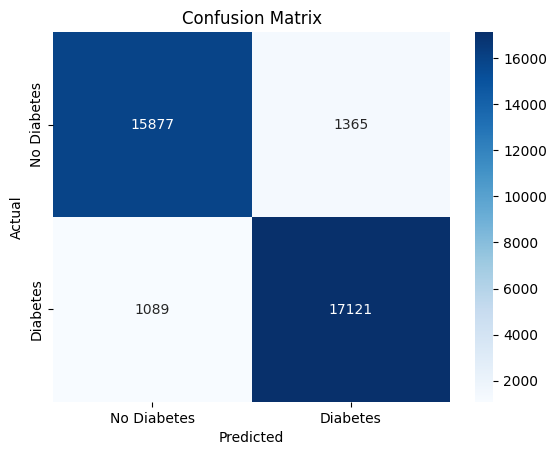

In [50]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, ANN_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a more complex ANN model
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=64, activation="relu"))
ann_model.add(tf.keras.layers.Dropout(0.5))
ann_model.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and a validation set
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = ann_model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = ann_model.evaluate(X_test_scaled, ANN_y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions on the test set
ANN_y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype(int)

# Display classification report
print("Classification Report:\n", classification_report(ANN_y_test, ANN_y_pred))

# Create a confusion matrix
ANN_cm = confusion_matrix(ANN_y_test, ANN_y_pred)
sns.heatmap(ANN_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **RESULTS EVALUATION**

## **Plotting Comparison of Models' Accuracy Before Balancing**

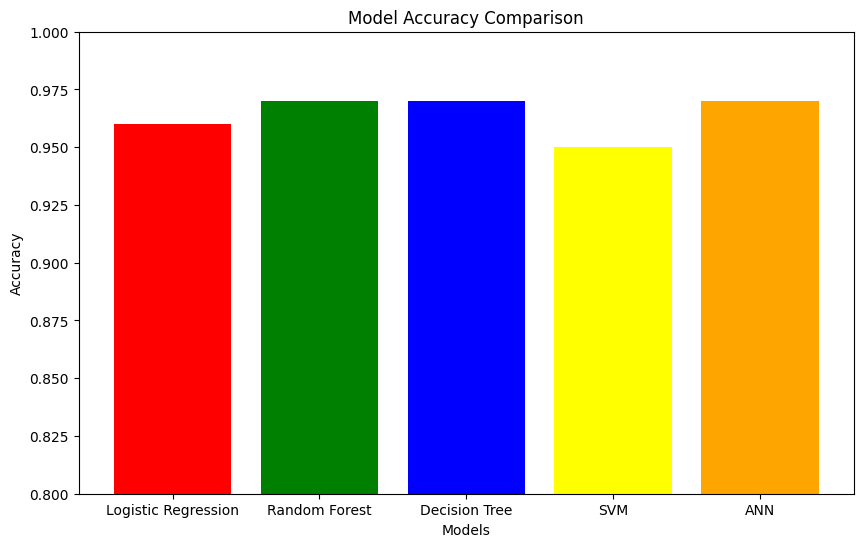

In [63]:
accuracies = {
    'Logistic Regression': 0.96,
    'Random Forest': 0.97,
    'Decision Tree': 0.97,
    'SVM': 0.95,
    'ANN': 0.97
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['red', 'green', 'blue', 'yellow','orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

## **Plotting Comparison of Models' Accuracy After Balancing**

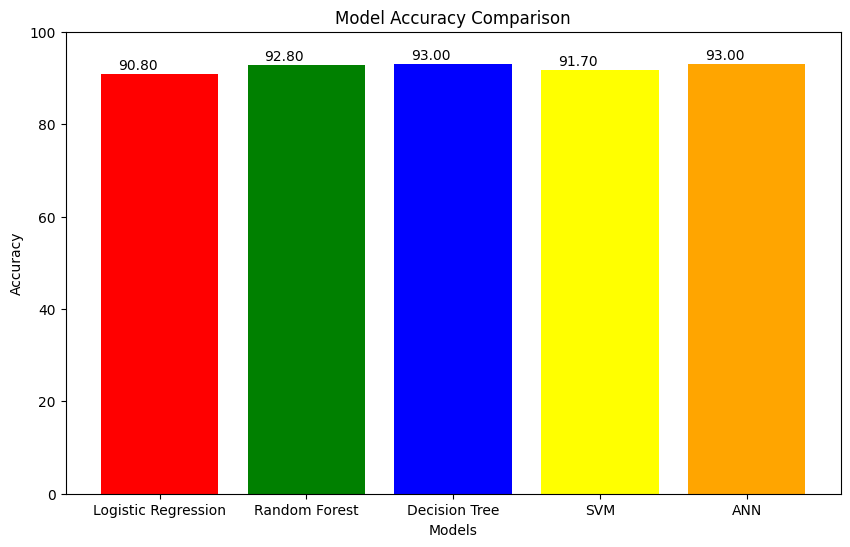

In [54]:
accuracies = {
    'Logistic Regression': 90.8,
    'Random Forest': 92.8,
    'Decision Tree': 93,
    'SVM': 91.7,
    'ANN': 93
}


plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['red', 'green', 'blue', 'yellow', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 100)

# Add text labels above each bar
for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{accuracy:.2f}', ha='center')

plt.show()

## **Cross Validation for all Models**

Logistic Regression Mean Accuracy: 0.9014877177201805
STD Mean: 0.009388316662944492
Decision Tree Mean Accuracy: 0.9292948237446055
STD Mean: 0.009453849135015452
Random Forest Mean Accuracy: 0.9306713613121497
STD Mean: 0.009878284935645736


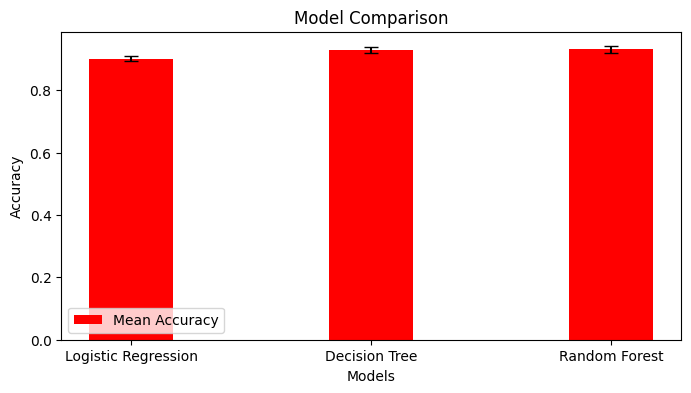

In [59]:
logistic_mean = lr_mean_scores.mean()
logistic_std = lr_std_scores.mean()
print("Logistic Regression Mean Accuracy:", logistic_mean)
print("STD Mean:", logistic_std)

# Decision Tree
dt_mean = dt_mean_scores.mean()
dt_std = dt_std_scores.mean()
print("Decision Tree Mean Accuracy:", dt_mean)
print("STD Mean:", dt_std)

# Random Forest
rf_mean = rf_mean_scores.mean()
rf_std = rf_std_scores.mean()
print("Random Forest Mean Accuracy:", rf_mean)
print("STD Mean:", rf_std)

# Plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
mean_accuracies = [logistic_mean, dt_mean, rf_mean]
std_accuracies = [logistic_std, dt_std, rf_std]

plt.figure(figsize=(8, 4))
bar_width = 0.35
index = range(len(models))

plt.bar(index, mean_accuracies, bar_width, label='Mean Accuracy', color='red', yerr=std_accuracies, capsize=5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(index, models)
plt.legend()
plt.show()

# **ROC and AUC**

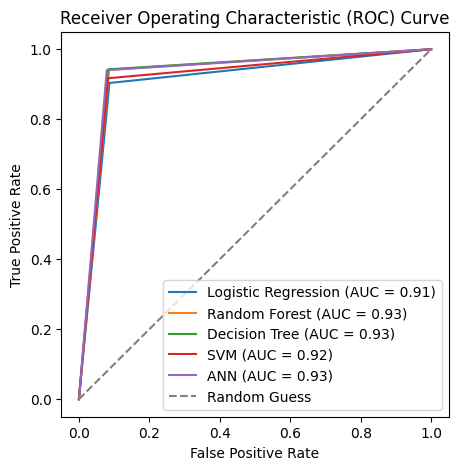

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predictions (y_scores) for each model

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(LR_y_test, LR_y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(RF_y_test, RF_y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(DT_y_test, DT_y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(SVM_y_test, SVM_y_pred)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# ANN
fpr_ann, tpr_ann, _ = roc_curve(ANN_y_test, ANN_y_pred)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {roc_auc_ann:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The ROC plot above shows that all of the classifiers on my dataset have a good performance. However, the ANN and decision tree models are performing slightly better than the rest of the models.